<a href="https://colab.research.google.com/github/pcoiffet/models/blob/main/LinearRegression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Project**

## Load Data

In [11]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv", sep = ",")
data.head()


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Data preparation

In [13]:
y = data['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [20]:
x = data.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [27]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [28]:
y_test

822    -3.380
118    -8.010
347    -2.160
1123   -1.170
924    -0.730
        ...  
1114   -4.130
427    -9.018
711    -0.600
4      -3.040
948    -2.900
Name: logS, Length: 229, dtype: float64

## Model

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)


In [32]:
pred_train

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [46]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

rf_mse_train = mean_squared_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)

rf_mse_test = mean_squared_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)

In [48]:
print("RF train MSE : ", rf_mse_train)
print("RF train R2 : ", rf_r2_train)
print("RF test MSE : ", rf_mse_test)
print("RF test R2 : ", rf_r2_test)

RF train MSE :  1.028227802112806
RF train R2 :  0.7596688824431413
RF test MSE :  1.407688264904896
RF test R2 :  0.7092230211002489


In [52]:
rf_results = pd.DataFrame(['Random Forest', rf_mse_train, rf_r2_train, rf_mse_test, rf_r2_test]).transpose()
rf_results.columns = ['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)

mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

0.7645051774663391

In [37]:
print("LR train MSE : ", mse_train)
print("LR train R2 : ", r2_train)
print("LR test MSE : ", mse_test)
print("LR test R2 : ", r2_test)

LR train MSE :  1.0075362951093687
LR train R2 :  0.7645051774663391
LR test MSE :  1.0206953660861033
LR test R2 :  0.7891616188563282


In [43]:
lr_results = pd.DataFrame(['Linear regression', mse_train, r2_train, mse_test, r2_test]).transpose()
lr_results.columns = ['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


In [53]:
df_models = pd.concat([lr_results, rf_results], axis = 0)
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [55]:
df_models.reset_index(drop = True)

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Viz

Text(0, 0.5, 'Experimental LogS')

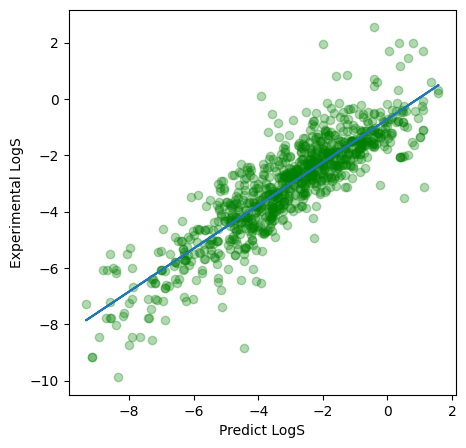

In [65]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x = y_train, y = pred_train, alpha = 0.3, color = 'g')

z = np.polyfit(y_train, pred_train, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train))

plt.xlabel('Predict LogS')
plt.ylabel('Experimental LogS')